# Import the libraries

In [1]:
###### Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system
import graphviz

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the Chicago Crime Data from 2001 to present

In [2]:
###### Load the data into dataframe
df = pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Project\\Chicago Crime\\Crimes_-_2001_to_present.csv")
df[:5]

C:\Users\poonam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [3]:
###### Check the column data types
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
####### Prints summary of a DataFrame - including index data types, column data types and their non-null counts
df.info()
####### Prints descriptive statistics. Generally includes count, mean, minimum and maximum values among other details for 
####### numeric values. We can set 'include' parameter to 'all' to get additional details around non-numeric data.
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105809 entries, 0 to 7105808
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.105809e+06,7105805,7105809,7105809,7105809,7105809,7105809,7099292,7105809,7105809,...,6.490980e+06,6.492314e+06,7105809,7.037454e+06,7.037454e+06,7.105809e+06,7105809,7.037454e+06,7.037454e+06,7037454
unique,NaN,7105374,2875528,60871,402,36,510,212,2,2,...,NaN,NaN,26,NaN,NaN,NaN,3376,NaN,NaN,870949
top,NaN,HJ590004,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,296,15657,578588,1502991,837272,1847811,5157954,6160270,...,NaN,NaN,1502991,NaN,NaN,NaN,2789245,NaN,NaN,13525
mean,6.503375e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.271033e+01,3.754696e+01,NaN,1.164543e+06,1.885738e+06,2.008860e+03,NaN,4.184206e+01,-8.767171e+01,NaN
std,3.200528e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.383574e+01,2.153571e+01,NaN,1.713330e+04,3.265700e+04,5.415304e+00,NaN,8.986196e-02,6.201304e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.542217e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152948e+06,1.859164e+06,2.004000e+03,NaN,4.176887e+01,-8.771379e+01,NaN
50%,6.494754e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.200000e+01,3.200000e+01,NaN,1.166034e+06,1.890660e+06,2.008000e+03,NaN,4.185576e+01,-8.766604e+01,NaN
75%,9.274383e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176355e+06,1.909245e+06,2.013000e+03,NaN,4.190675e+01,-8.762832e+01,NaN


In [5]:
####### Checking if there are any null values in the dataset. 
df.isnull().values.any()

True

In [6]:
###### Check to see how many missing values there are in the dataframe
df.isnull().sum().sum()

1576667

In [7]:
###### Now, locate where the missing values occur
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6517
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613495
FBI Code                     0
X Coordinate             68355
Y Coordinate             68355
Year                         0
Updated On                   0
Latitude                 68355
Longitude                68355
Location                 68355
dtype: int64

# Crime Trend in chicago between 2001 to 2019

In [8]:
df_year=df[['ID','Year']]
#df_year[:5]
totalbyyear=df_year.groupby(['Year']).count()
totalbyyear1=totalbyyear[totalbyyear.index<=2019]
totalbyyear1[:5]

,ID
Year,
2001,485767
2002,486763
2003,475956
2004,469392
2005,453725


Text(0, 0.5, 'Crime count')

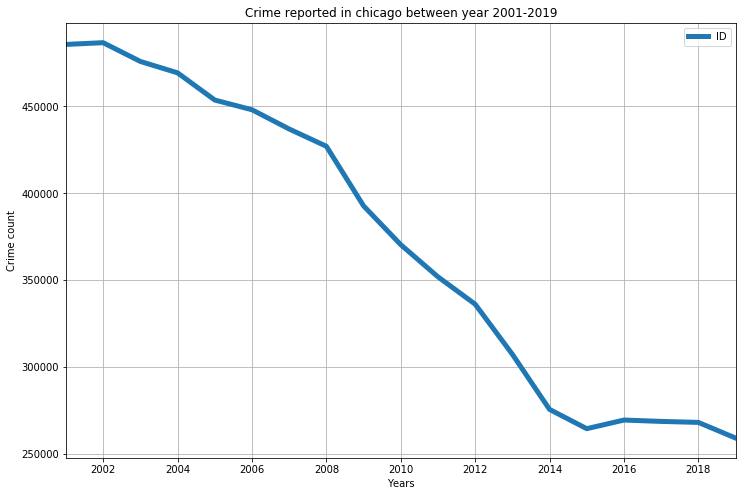

In [9]:
plt_comm=totalbyyear1.plot(figsize=(12,8),title="Crime reported in chicago between year 2001-2019",grid= True,linewidth=5)
plt_comm.set_xlabel("Years")
plt_comm.set_ylabel("Crime count")

# Types of Crime in chicago

In [10]:
df_typeofcrime=df[['Primary Type','FBI Code']]
df_typeofcrime[:5]

,Primary Type,FBI Code
0,DECEPTIVE PRACTICE,11
1,CRIM SEXUAL ASSAULT,02
2,BURGLARY,05
3,THEFT,06
4,CRIM SEXUAL ASSAULT,02


In [11]:
df_typeofcrime1=df_typeofcrime.groupby(['Primary Type']).count()
df_typeofcrime2=df_typeofcrime1.sort_values(by=['FBI Code'],ascending=False)
df_typeofcrime2[:5]

,FBI Code
Primary Type,
THEFT,1502991
BATTERY,1299694
CRIMINAL DAMAGE,807897
NARCOTICS,730613
ASSAULT,446563


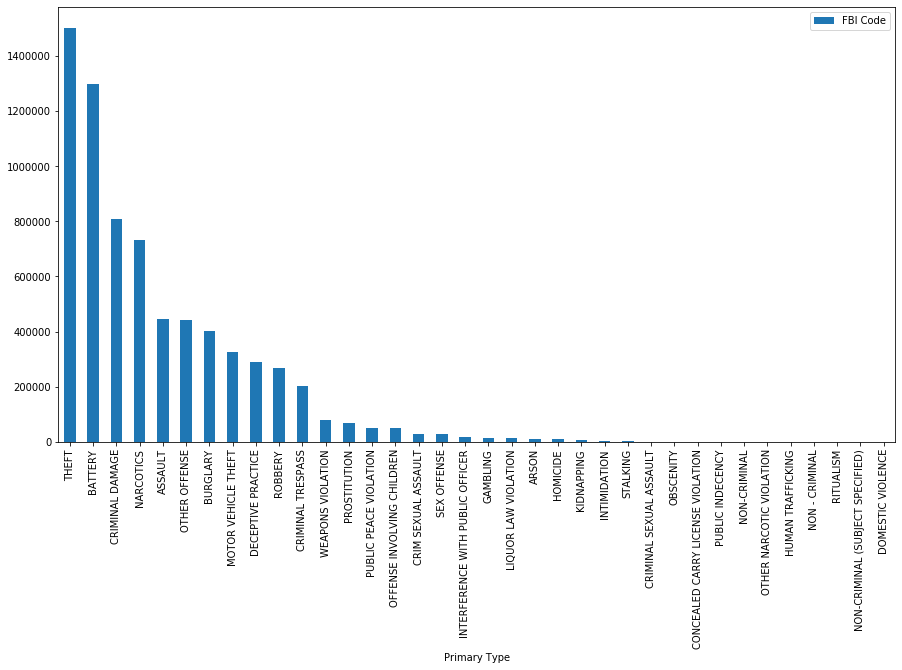

In [12]:
###### Bar diagram to show the types of crime in chicago in increasing order
plt_type=df_typeofcrime2.plot.bar(figsize=(15,8))

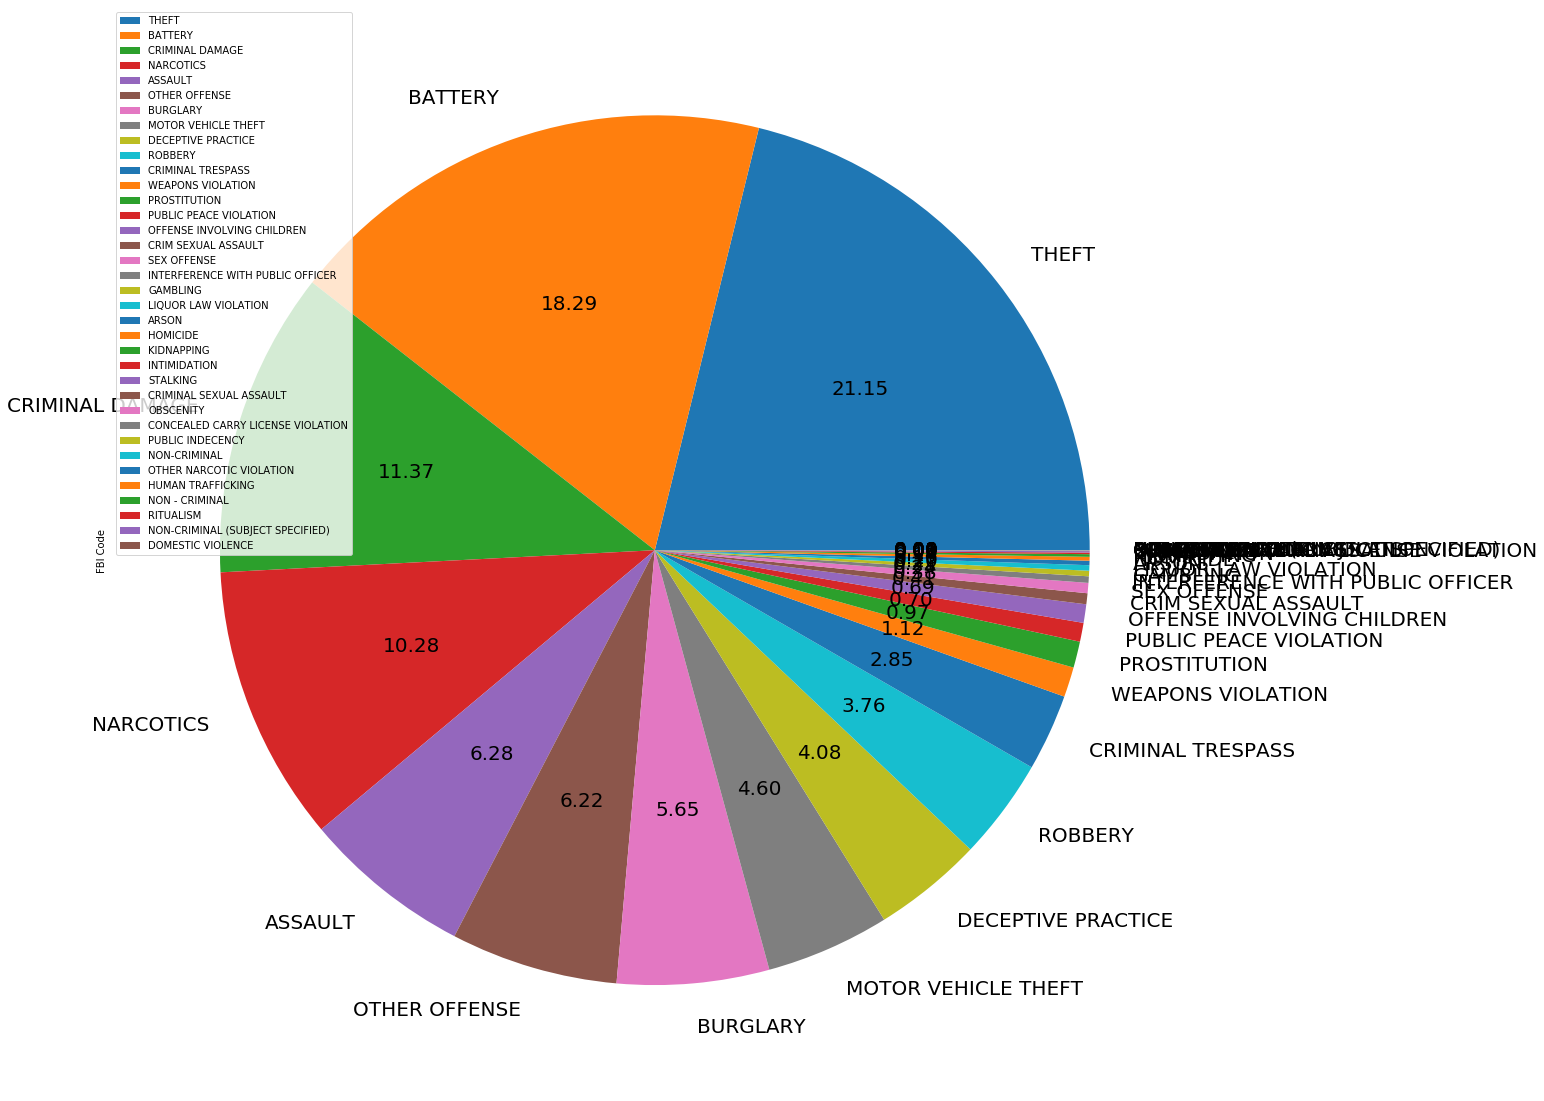

In [13]:
###### Pie chart to display the % share of each type in total crime reported
df_typeofcrime2.plot.pie(y =0,figsize=(30,20),autopct='%.2f',fontsize=20)


# Most Dangerous communities in chicago

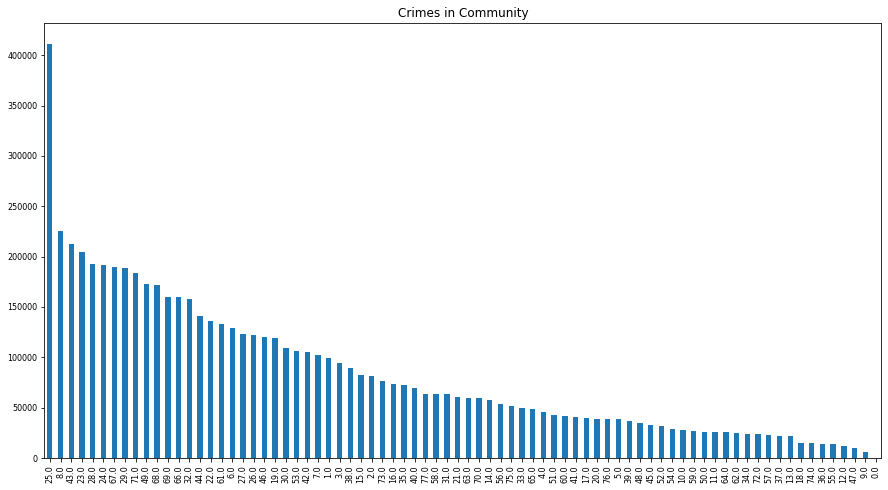

In [14]:
# to find the number of incidence per community
df_communityarea=df['Community Area'].value_counts(sort=True)
df_communityarea.plot.bar(title='Crimes in Community', figsize=(15, 8), fontsize=8)
plt.show()

In [15]:
df_communityarea1=df_communityarea.to_frame()
df_communityarea1.head()

,Community Area
25.0,411177
8.0,225697
43.0,212296
23.0,204946
28.0,192972


In [16]:
df_communityarea1.columns

Index(['Community Area'], dtype='object')

# Load the povery and crime data from another data set

In [17]:
df_povCrime = pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Project\\Chicago Crime\\Chicago_poverty_and_crime.csv",index_col='Community Area')
df_povCrime[:5]

,Community Area Name,Assault (Homicide),Firearm-related,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
Community Area,,,,,,,,,
1,Rogers Park,7.7,5.2,22.7,7.9,28.8,18.1,23714,7.5
2,West Ridge,5.8,3.7,15.1,7.0,38.3,19.6,21375,7.9
3,Uptown,5.4,4.6,22.7,4.6,22.2,13.6,32355,7.7
4,Lincoln Square,5.0,6.1,9.5,3.1,25.6,12.5,35503,6.8
5,North Center,1.0,1.0,7.1,0.2,25.5,5.4,51615,4.5


In [18]:
df_povCrime1=df_povCrime[['Community Area Name']]
df_povCrime1[:5]

,Community Area Name
Community Area,
1,Rogers Park
2,West Ridge
3,Uptown
4,Lincoln Square
5,North Center


In [19]:
df_povCrime1.columns

Index(['Community Area Name'], dtype='object')

In [20]:
df_temp=df_communityarea1.join(df_povCrime1)
df_temp.head()

,Community Area,Community Area Name
25.0,411177,Austin
8.0,225697,Near North Side
43.0,212296,South Shore
23.0,204946,Humboldt Park
28.0,192972,Near West Side


In [21]:
df_temp1=df_temp.set_index('Community Area Name')

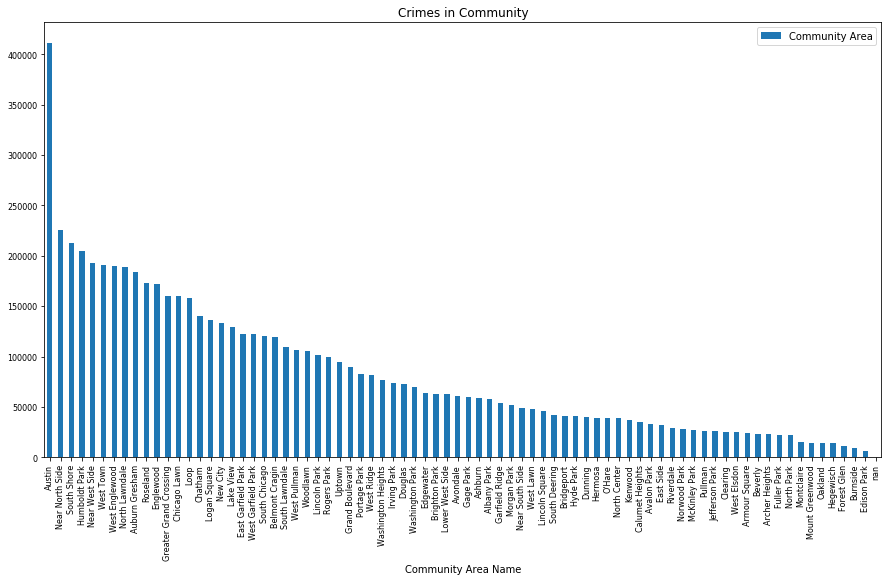

In [22]:
df_temp1.plot.bar(title='Crimes in Community', figsize=(15, 8), fontsize=8)

# Most unsafe locations in chicago

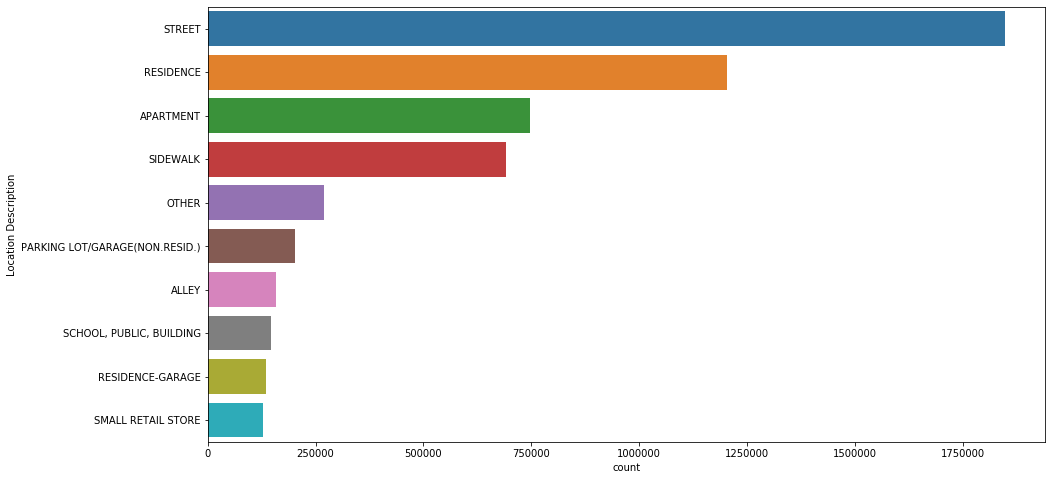

In [23]:
plt.figure(figsize=(15, 8))
sn.countplot(y='Location Description', data=df, order=df['Location Description'].value_counts().iloc[:10].index)
plt.show()

# Relationship between Crime and Poverty

In [24]:
df_temp1[:5]

,Community Area
Community Area Name,
Austin,411177
Near North Side,225697
South Shore,212296
Humboldt Park,204946
Near West Side,192972


In [25]:
df_poverty=df_povCrime[['Community Area Name','Below Poverty Level']]
df_poverty1=df_poverty.set_index('Community Area Name')
df_poverty1[:5]

,Below Poverty Level
Community Area Name,
Rogers Park,22.7
West Ridge,15.1
Uptown,22.7
Lincoln Square,9.5
North Center,7.1


In [26]:
df_temp2=df_temp1.join(df_poverty1)
df_temp2[:5]

,Community Area,Below Poverty Level
Community Area Name,,
Austin,411177,27.0
Near North Side,225697,13.4
South Shore,212296,31.5
Humboldt Park,204946,32.6
Near West Side,192972,21.6


In [27]:
df_temp3=df_temp2.dropna()
df_temp3[:5]

,Community Area,Below Poverty Level
Community Area Name,,
Austin,411177,27.0
Near North Side,225697,13.4
South Shore,212296,31.5
Humboldt Park,204946,32.6
Near West Side,192972,21.6


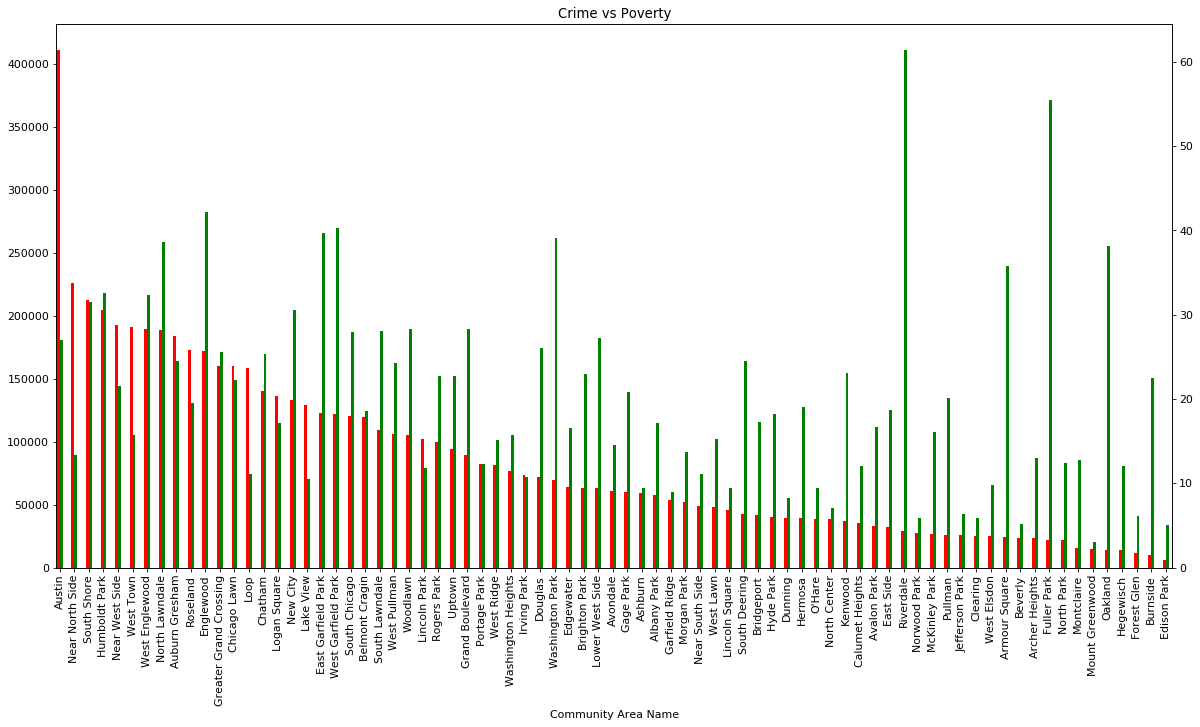

In [28]:
####### Bar diagram to show the Crime and Poverty
plt.rcParams.update({'font.size': 11})
df_temp3.columns=['community_area','poverty']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2

df_temp3.community_area.plot(kind='bar', color='red',ax=ax, width=width, position=1,title="Crime vs Poverty")
df_temp3.poverty.plot(kind='bar',color='green',ax=ax2,width=width,position=0)
plt.show()

In [29]:
###### Pearson cofficient of correlation to find the realtionship between two variables
pearson_coef, p_value = stats.pearsonr(df_temp3["community_area"], df_temp3["poverty"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef)

Pearson Correlation Coefficient:  0.29668143468222774


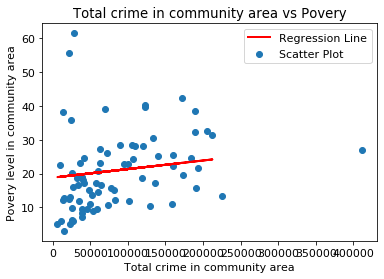

In [30]:
###### Linear regression model to find the relationship between crime and poverty
xc=df_temp3["community_area"].values.reshape(-1,1)
yc=df_temp3["poverty"].values.reshape(-1,1)

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.4, random_state=1)
reg=LinearRegression() # create a model
reg.fit(xc_train, yc_train) # fit a model
yc_pred=reg.predict(xc_test) # predict a model

plt.scatter(xc,yc,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.plot(xc_test,yc_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Total crime in community area')
plt.ylabel('Povery level in community area')
plt.title("Total crime in community area vs Povery")
plt.legend()
plt.show()

# Relationship between Crime and  Per capita income 

In [31]:
df_income=df_povCrime[['Community Area Name','Per Capita Income']]
df_income1=df_income.set_index('Community Area Name')
df_income1[:5]

,Per Capita Income
Community Area Name,
Rogers Park,23714
West Ridge,21375
Uptown,32355
Lincoln Square,35503
North Center,51615


In [32]:
df_income_temp=df_temp1.join(df_income1)
df_income_temp[:5]

,Community Area,Per Capita Income
Community Area Name,,
Austin,411177,15920.0
Near North Side,225697,87163.0
South Shore,212296,18366.0
Humboldt Park,204946,13391.0
Near West Side,192972,41488.0


In [33]:
df_income_temp1=df_income_temp.dropna()

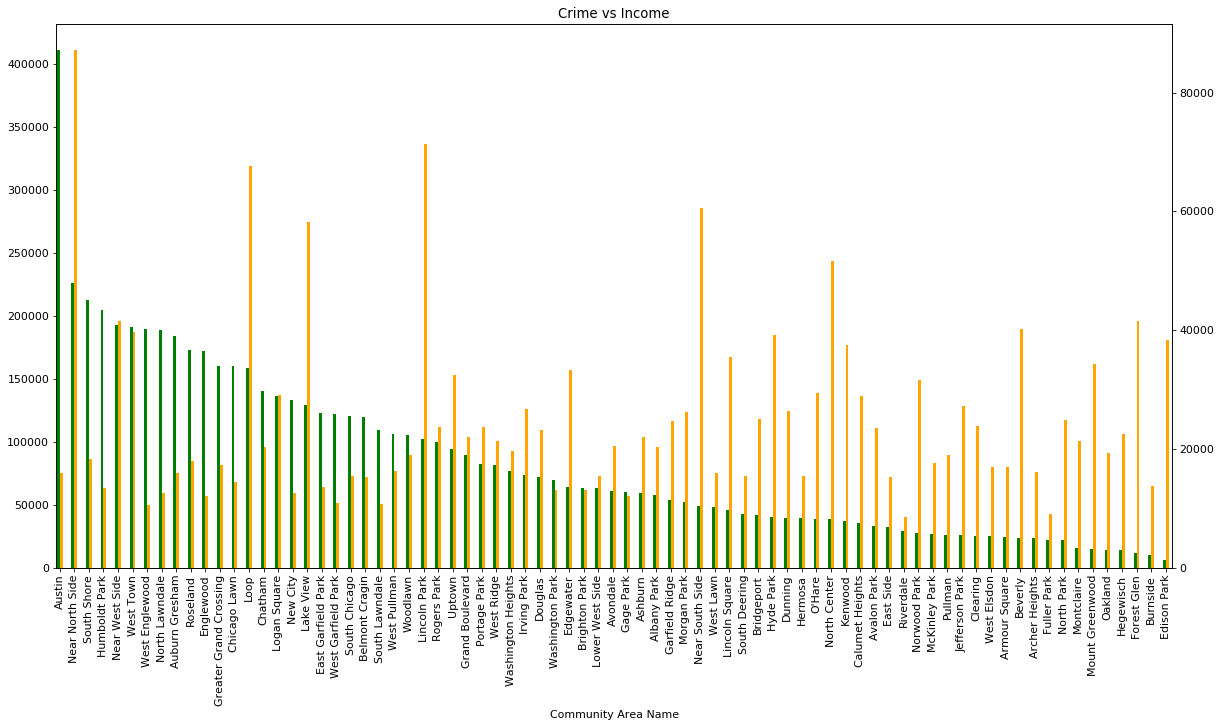

In [34]:
df_income_temp1.columns=['community_area','income']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2

df_income_temp1.community_area.plot(kind='bar', color='green',ax=ax, width=width, position=1,title='Crime vs Income')
df_income_temp1.income.plot(kind='bar',color='orange',ax=ax2,width=width,position=0)
plt.show()

In [35]:
pearson_coef, p_value = stats.pearsonr(df_income_temp1["community_area"], df_income_temp1["income"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef)

Pearson Correlation Coefficient:  0.03081327464801677


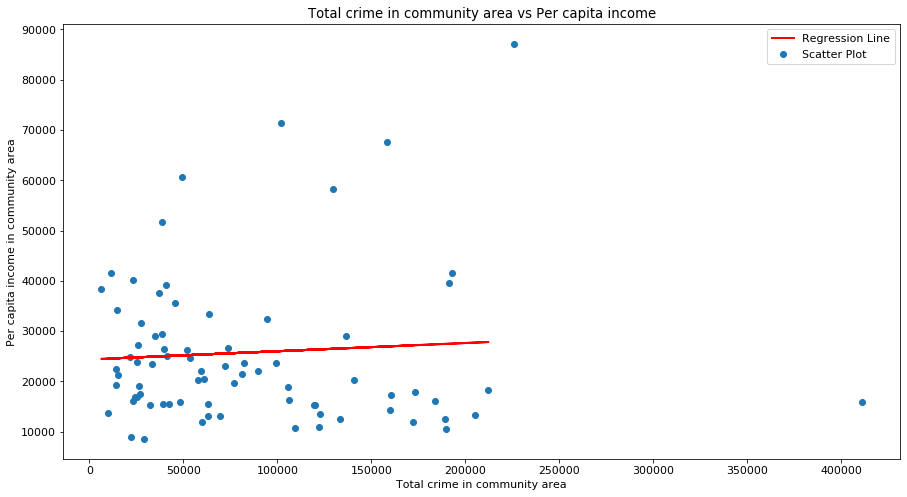

In [36]:
xc=df_income_temp1["community_area"].values.reshape(-1,1)
yc=df_income_temp1["income"].values.reshape(-1,1)

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.4, random_state=1)
reg=LinearRegression() # create a model
reg.fit(xc_train, yc_train) # fit a model
yc_pred=reg.predict(xc_test) # predict a model

plt.scatter(xc,yc,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.plot(xc_test,yc_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Total crime in community area')
plt.ylabel('Per capita income in community area')
plt.title("Total crime in community area vs Per capita income")
plt.legend()
plt.show()

# Relationship between Crime and Education

In [37]:
df_education=df_povCrime[['Community Area Name','No High School Diploma']]
df_education1=df_education.set_index('Community Area Name')
df_education1[:5]

,No High School Diploma
Community Area Name,
Rogers Park,18.1
West Ridge,19.6
Uptown,13.6
Lincoln Square,12.5
North Center,5.4


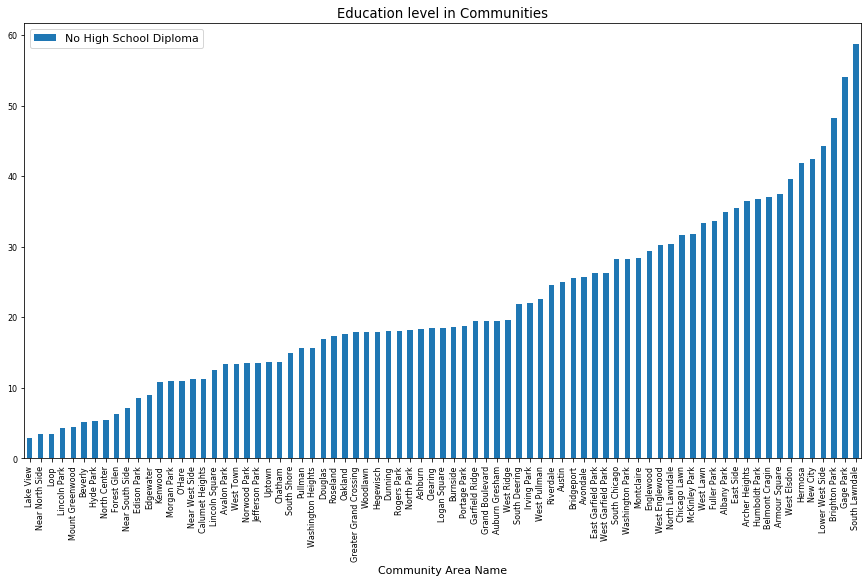

In [38]:
df_education2=df_education1.sort_values(by=['No High School Diploma'])
df_education2.plot.bar(title='Education level in Communities', figsize=(15, 8), fontsize=8)

In [39]:
df_education_temp=df_temp1.join(df_education2)
df_education_temp[:5]
df_education_temp1=df_education_temp.dropna()

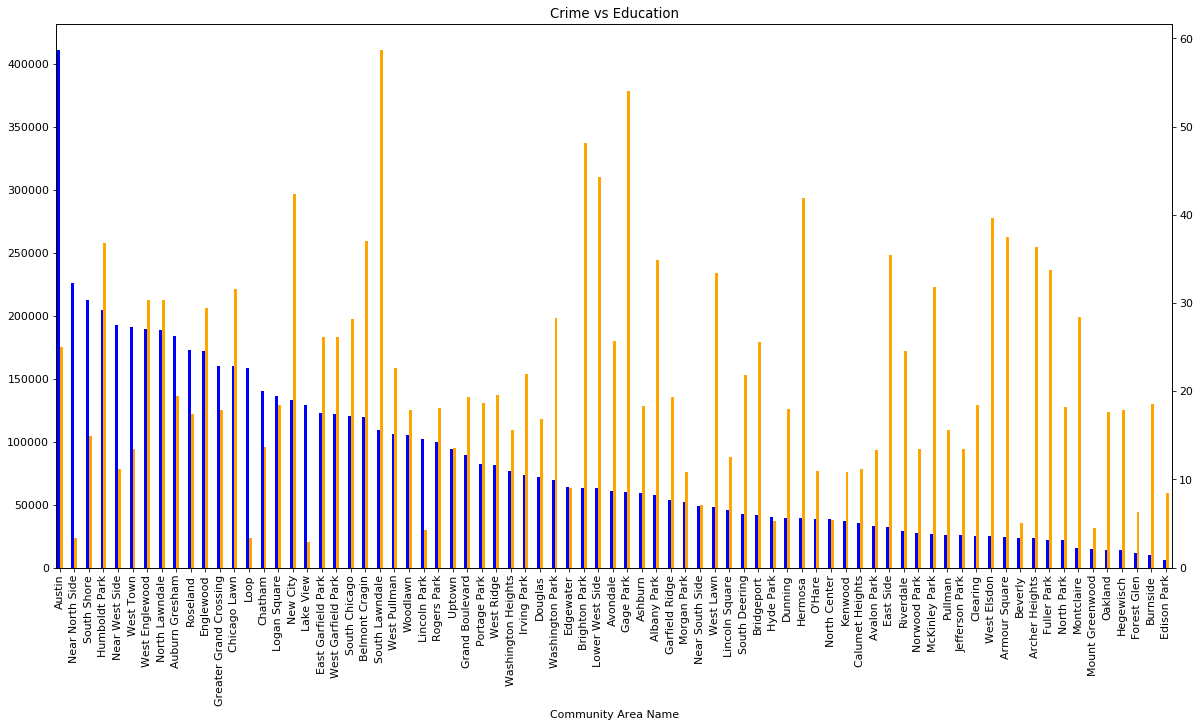

In [40]:
df_education_temp1.columns=['community_area','education']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2

df_education_temp1.community_area.plot(kind='bar', color='blue',ax=ax, width=width, position=1,title='Crime vs Education')
df_education_temp1.education.plot(kind='bar',color='orange',ax=ax2,width=width,position=0)
plt.show()

In [41]:
pearson_coef, p_value = stats.pearsonr(df_education_temp1["community_area"], df_education_temp1["education"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef)

Pearson Correlation Coefficient:  0.03334422464457487


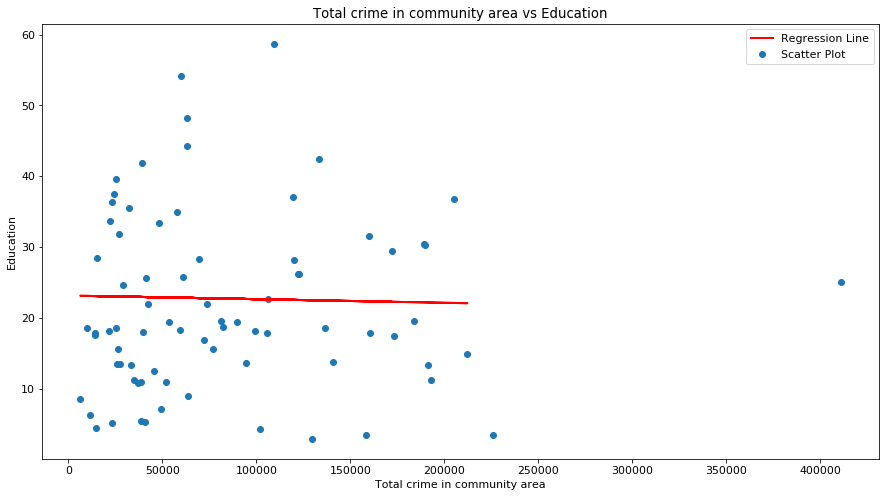

In [42]:
xc=df_education_temp1["community_area"].values.reshape(-1,1)
yc=df_education_temp1["education"].values.reshape(-1,1)

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.4, random_state=1)
reg=LinearRegression() # create a model
reg.fit(xc_train, yc_train) # fit a model
yc_pred=reg.predict(xc_test) # predict a model

plt.scatter(xc,yc,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.plot(xc_test,yc_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Total crime in community area')
plt.ylabel('Education')
plt.title("Total crime in community area vs Education")
plt.legend()
plt.show()